# Final project for Artificial Intelligence and Machine Learning Course at Univeristy of Chicago

Goal of our project is to predict future REIT performance through stock data, real estate portfolio data and news article sentiment analysis. For the scope of this analysis, we will focus on the office sector within REITs as a way of narrowing our scope. 

By Cameron Keith and Jonathan Ling (August 2023)

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
# Read in Green Street data
df = pd.read_excel('Green Street REIT Data.xlsx')
print(df.shape)
df.head()

(29774, 227)


,date,comp_id,sector_id,sector_pm1_id,date_bom,date_bs,date_eom,date_last_published,date_mrpo,date_price,...,cg_wme_auto_exemption_points,cg_wme_veto_points,cg_wme_rights_points,cg_wme_rights_authority_points,cg_wme_rights_total_points,cg_wme_points,cg_other_materiality_points,cg_other_tax_basis_points,cg_other_points,cg_score
0,1988-10-24,6,NaN,NaN,1988-11-01,NaT,1988-10-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-10-24,7,1.0,NaN,1988-11-01,NaT,1988-10-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-10-24,16,NaN,NaN,1988-11-01,NaT,1988-10-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-10-24,30,11.0,NaN,1988-11-01,NaT,1988-10-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-10-24,31,NaN,NaN,1988-11-01,NaT,1988-10-01,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Examine empty values
df.isnull().sum()

date                               0
comp_id                            0
sector_id                       2023
sector_pm1_id                  13274
date_bom                           0
                               ...  
cg_wme_points                  11635
cg_other_materiality_points    19223
cg_other_tax_basis_points      12746
cg_other_points                11637
cg_score                       11558
Length: 227, dtype: int64

In [25]:
# Convert date type
df['date'] = df['date'].astype('datetime64[ns]')

In [26]:
# Let's drop descriptive features that won't help our model
drop_list = ['comp_id','sector_id','sector_pm1_id','date_bom','date_bs',
             'date_eom','date_last_published','date_mrpo','date_price','company','ticker_bb',
             'currency_symbol','sector_abbr','sector_pm1','sector_rt','initial1','initial2']

df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(drop_list, axis=1)

In [27]:
# Simple model example (office sector)
testing_vars = ['date','sector','symbol','price','total_return_daily','dividend_yield',
                'cash','assets_current','liabilities_current','operating_value_re','nav',
                'nav_premium','noi','noi_economic','capex_reserve','caprate_nominal_implied']
df_testing = df_cleaned.loc[df_cleaned['sector'] == 'Office']
df_testing = df_testing[testing_vars]
df_testing.head()

,date,sector,symbol,price,total_return_daily,dividend_yield,cash,assets_current,liabilities_current,operating_value_re,nav,nav_premium,noi,noi_economic,capex_reserve,caprate_nominal_implied
1352,1993-01-29,Office,RCP,8.38,NaN,NaN,NaN,NaN,NaN,NaN,12.0,-0.301667,NaN,NaN,NaN,NaN
1370,1993-02-25,Office,CRE,24.25,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.154762,NaN,NaN,NaN,NaN
1388,1993-02-25,Office,RCP,9.50,NaN,NaN,NaN,NaN,NaN,NaN,12.0,-0.208333,NaN,NaN,NaN,NaN
1406,1993-03-25,Office,CRE,26.00,NaN,0.065,NaN,NaN,NaN,NaN,23.5,0.106383,NaN,NaN,NaN,NaN
1424,1993-03-25,Office,RCP,9.13,NaN,0.110,NaN,NaN,NaN,NaN,12.0,-0.239167,NaN,NaN,NaN,NaN


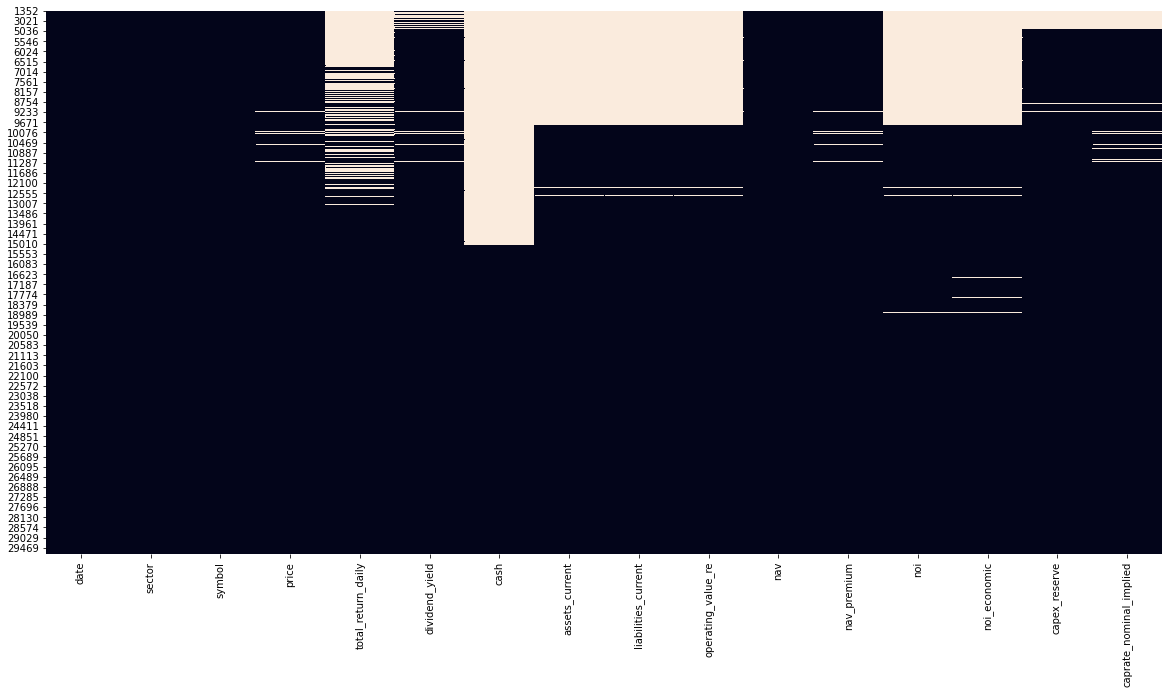

In [31]:
# Visualize where null values are
sns.heatmap(df_testing.isnull(), cbar=False)
plt.show()